Author: Tony Nguyen
Last Modified: Mar 28, 2022

## Install tensorflow datasets

In [1]:
pip install -q tensorflow tensorflow-datasets

Note: you may need to restart the kernel to use updated packages.


## Import Necessary Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras

## View Available Tensorflow Datasets

In [3]:
# tfds.list_builders()

# 1. Getting Started

In [4]:
## 1. Choose Builder and Print out Data Information

builder = tfds.builder(
    'rock_paper_scissors',
    try_gcs=False,
)

In [5]:
## 2. Load the Data and Split Train and Test Sets

(ds_train, ds_test), ds_info = tfds.load(
    'rock_paper_scissors',
    split=['train', 'test'],
    #batch_size = -1, #needed to return tuples; breaks tfds.show_examples() if true
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

print(ds_info)

len(ds_train)/(len(ds_train)+len(ds_test))

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='C:\\Users\\TonyPC\\tensorflow_datasets\\rock_paper_scissors\\3.0.0',
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)


0.8713692946058091

a. What is the image shape? What does each number mean?

The shape is the number of dimensions an image has. In the case of this dataset, it has a shape of (300, 300, 3) which represent its height, width, and channel; a channel of 3 implies that the image is RGB.  

b. What percentage of the data is considered as the training set?

2520 out of 2892 or 87.1% of the images are considered to be in the training set

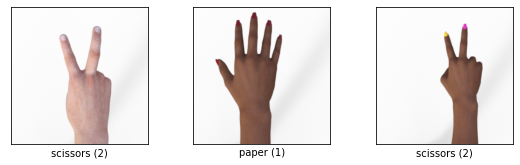

In [6]:
# c. Show Three Example Images from test
fig = tfds.show_examples(ds_test, ds_info, rows=1, cols=3)

In [42]:
# function for all preprocessing steps
def preprocessing(dataset):
    ds = tfds.as_numpy(dataset)
    imgs = ds[0]
    imgs = imgs[...,0] #removes channel dimension
    imgs = imgs[...,np.newaxis]/255 *# adds channel values as 1 and scales height and width 
    labels = ds[1]
    return imgs, labels

In [44]:
## 3. Convert tensorflow dataset format into numpy format, adjust the number of colour channels, &
## 4. Scale image vales
ds_train, ds_test = tfds.load(
    'rock_paper_scissors',
    split=['train','test'],
    batch_size = -1, #needed to return tuples
    shuffle_files=True,
    as_supervised=True,
)

train_imgs, train_labels = preprocessing(ds_train)
test_imgs, test_labels = preprocessing(ds_test)

(2520, 300, 300, 1)
[[[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 ...

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [0.99607843]
  [0.99607843]
  [0.99607843]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [0.99607843]
  [0.99215686]
  [0.99607843]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [0.99607843]
  [0.99607843]
  [0.99215686]]]


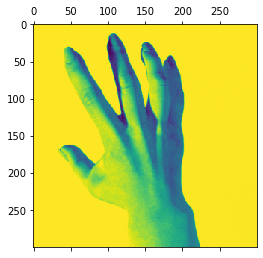

In [90]:
print(train_imgs.shape)
print(train_imgs[0])
plt.matshow(train_imgs[300])

# 2. Basic Feedforward Neural Network Model 

In [81]:
# 1. Flattening data
train_imgs_flat = train_imgs.reshape(train_imgs.shape[0],
                                     train_imgs.shape[1]*train_imgs.shape[2],
                                     train_imgs.shape[3])
test_imgs_flat = test_imgs.reshape(test_imgs.shape[0],
                                     test_imgs.shape[1]*test_imgs.shape[2],
                                     test_imgs.shape[3])

'relu' Layers

In [201]:
# 2. Model Creation

relu_model = keras.Sequential([
    keras.layers.Dense(100, input_shape=( train_imgs.shape[1]*train_imgs.shape[2],), activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [202]:
# 3. Compiling model
relu_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [203]:
# 4. Training model
relu_train = relu_model.fit(train_imgs_flat, train_labels, epochs=10)

Epoch 1/10
79/79 [==============================] - 3s 31ms/step - loss: 5.5915 - accuracy: 0.4194
Epoch 2/10
79/79 [==============================] - 2s 31ms/step - loss: 0.7472 - accuracy: 0.6944
Epoch 3/10
79/79 [==============================] - 2s 31ms/step - loss: 0.5664 - accuracy: 0.7821
Epoch 4/10
79/79 [==============================] - 2s 31ms/step - loss: 0.5500 - accuracy: 0.7869
Epoch 5/10
79/79 [==============================] - 2s 31ms/step - loss: 0.3083 - accuracy: 0.8845
Epoch 6/10
79/79 [==============================] - 3s 32ms/step - loss: 0.2997 - accuracy: 0.8885
Epoch 7/10
79/79 [==============================] - 2s 31ms/step - loss: 0.1832 - accuracy: 0.9413
Epoch 8/10
79/79 [==============================] - 3s 32ms/step - loss: 0.1482 - accuracy: 0.9536
Epoch 9/10
79/79 [==============================] - 2s 31ms/step - loss: 0.3784 - accuracy: 0.8794
Epoch 10/10
79/79 [==============================] - 3s 32ms/step - loss: 0.1143 - accuracy: 0.9671


In [209]:
from keras.callbacks import History as history
accuracy_train = relu_train.history['accuracy']

loss_train = relu_train.history['accuracy']
print('The accuracy of the last epoch (10) is: %f %%' %(accuracy_train[9]*100))

The accuracy of the last epoch (10) is: 96.706349 %


In [211]:
#5. Model Evaluation
relu_test = relu_model.evaluate(test_imgs_flat, test_labels)

12/12 [==============================] - 0s 8ms/step - loss: 2.2749 - accuracy: 0.4839


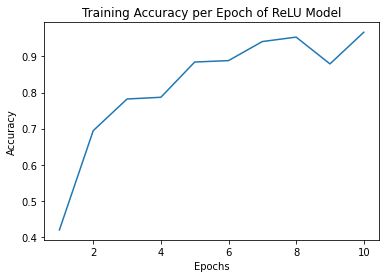

In [210]:
epochs = range(1,11)
plt.plot(epochs, accuracy_train, label='Training Accuracy')
plt.title('Training Accuracy per Epoch of ReLU Model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

'tanh' Layers

In [212]:
## 6. 'tanh' Layers
# Model Creation
tanh_model = keras.Sequential([
    keras.layers.Dense(100, input_shape=( train_imgs.shape[1]*train_imgs.shape[2],), activation='tanh'),
    keras.layers.Dense(100, activation='tanh'),
    keras.layers.Dense(3, activation='softmax')
])

# Compiling model
tanh_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training model
tanh_model.fit(train_imgs_flat, train_labels, epochs=10)

# Model Evaluation
tanh_test = tanh_model.evaluate(test_imgs_flat, test_labels)

Epoch 1/10
79/79 [==============================] - 3s 34ms/step - loss: 1.3538 - accuracy: 0.3306
Epoch 2/10
79/79 [==============================] - 3s 32ms/step - loss: 1.1139 - accuracy: 0.3369
Epoch 3/10
79/79 [==============================] - 3s 32ms/step - loss: 1.1076 - accuracy: 0.3333
Epoch 4/10
79/79 [==============================] - 3s 33ms/step - loss: 1.1069 - accuracy: 0.3341
Epoch 5/10
79/79 [==============================] - 3s 32ms/step - loss: 1.1136 - accuracy: 0.3246
Epoch 6/10
79/79 [==============================] - 2s 31ms/step - loss: 1.1052 - accuracy: 0.3385
Epoch 7/10
79/79 [==============================] - 3s 33ms/step - loss: 1.1065 - accuracy: 0.3226
Epoch 8/10
79/79 [==============================] - 3s 33ms/step - loss: 1.1069 - accuracy: 0.3353
Epoch 9/10
79/79 [==============================] - 3s 33ms/step - loss: 1.1044 - accuracy: 0.3270
Epoch 10/10
12/12 [==============================] - 0s 8ms/step - loss: 1.1032 - accuracy: 0.3333


In [215]:
print(metrics)

[[2.27488089 0.48387095]
 [1.10319281 0.33333334]]


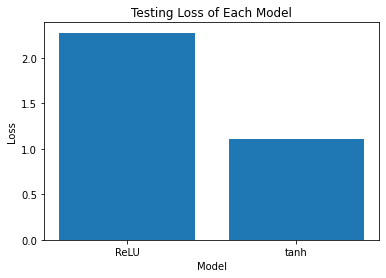

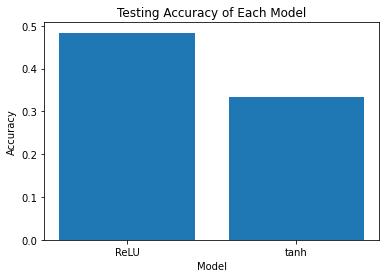

In [214]:
# Using bar charts, show how the evaluation results (i.e. loss and accuracy) change, Discuss why
columns = ['ReLU','tanh']
metrics = np.vstack((relu_test,tanh_test))

plt.bar(columns, metrics[:,0])
plt.title('Testing Loss of Each Model')
plt.xlabel('Model')
plt.ylabel('Loss')
plt.show()

plt.bar(columns, metrics[:,1])
plt.title('Testing Accuracy of Each Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


7. Is there any advantage for using “softmax” as the activation function for the output layer? 

# 3. CNNs

A. First CNN

In [143]:
## Testing different filter values to obtain model that has best trade-off between accuracy and speed
# filter values of 64 and 32 yield 55% accuracy at ~1 hour of processing time

cnn1 = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(train_imgs.shape[1],
                                                                           train_imgs.shape[2],
                                                                           train_imgs.shape[3])),
    keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax')
])

# Compiling model
cnn1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training model
cnn1.fit(train_imgs, train_labels, epochs=10)

# Model Evaluation
cnn1.evaluate(test_imgs, test_labels)

Epoch 1/10
79/79 [==============================] - 314s 4s/step - loss: 3.4156 - accuracy: 0.6060
Epoch 2/10
79/79 [==============================] - 323s 4s/step - loss: 0.2156 - accuracy: 0.9540
Epoch 3/10
79/79 [==============================] - 308s 4s/step - loss: 0.0480 - accuracy: 0.9913
Epoch 4/10
79/79 [==============================] - 302s 4s/step - loss: 0.0162 - accuracy: 0.9984
Epoch 5/10
79/79 [==============================] - 323s 4s/step - loss: 0.0049 - accuracy: 0.9992
Epoch 6/10
79/79 [==============================] - 320s 4s/step - loss: 0.0028 - accuracy: 1.0000
Epoch 7/10
79/79 [==============================] - 330s 4s/step - loss: 0.0019 - accuracy: 1.0000
Epoch 8/10
79/79 [==============================] - 319s 4s/step - loss: 0.0011 - accuracy: 1.0000
Epoch 9/10
79/79 [==============================] - 328s 4s/step - loss: 7.0980e-04 - accuracy: 1.0000
Epoch 10/10
12/12 [==============================] - 7s 538ms/step - loss: 2.0908 - accuracy: 0.5511


[2.090820550918579, 0.551075279712677]

In [145]:
# filter values of 32 and 16 yield 57% accuracy at ~20 mins of processing time

cnn1_1 = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(train_imgs.shape[1],
                                                                           train_imgs.shape[2],
                                                                           train_imgs.shape[3])),
    keras.layers.Conv2D(16, kernel_size=3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax')
])

# Compiling model
cnn1_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training model
cnn1_1.fit(train_imgs, train_labels, epochs=10)

# Model Evaluation
cnn1_1.evaluate(test_imgs, test_labels)

Epoch 1/10
79/79 [==============================] - 137s 2s/step - loss: 3.5177 - accuracy: 0.6389
Epoch 2/10
79/79 [==============================] - 126s 2s/step - loss: 0.2522 - accuracy: 0.9472
Epoch 3/10
79/79 [==============================] - 111s 1s/step - loss: 0.0558 - accuracy: 0.9929
Epoch 4/10
79/79 [==============================] - 111s 1s/step - loss: 0.0128 - accuracy: 0.9992
Epoch 5/10
79/79 [==============================] - 114s 1s/step - loss: 0.0075 - accuracy: 1.0000
Epoch 6/10
79/79 [==============================] - 119s 2s/step - loss: 0.0037 - accuracy: 1.0000
Epoch 7/10
79/79 [==============================] - 123s 2s/step - loss: 0.0019 - accuracy: 1.0000
Epoch 8/10
79/79 [==============================] - 123s 2s/step - loss: 0.0011 - accuracy: 1.0000
Epoch 9/10
79/79 [==============================] - 125s 2s/step - loss: 7.9346e-04 - accuracy: 1.0000
Epoch 10/10
12/12 [==============================] - 3s 193ms/step - loss: 1.6611 - accuracy: 0.5672


[1.6610660552978516, 0.5672042965888977]

In [146]:
# filter values of 16 and 8 yield 68% accuracy at ~12 mins of processing time
cnn1_2 = keras.Sequential([
    keras.layers.Conv2D(16, kernel_size=3, activation='relu', input_shape=(train_imgs.shape[1],
                                                                           train_imgs.shape[2],
                                                                           train_imgs.shape[3])),
    keras.layers.Conv2D(8, kernel_size=3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax')
])

# Compiling model
cnn1_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training model
cnn1_2.fit(train_imgs, train_labels, epochs=10)

# Model Evaluation
cnn1_2.evaluate(test_imgs, test_labels)

Epoch 1/10
79/79 [==============================] - 70s 889ms/step - loss: 3.9581 - accuracy: 0.7333
Epoch 2/10
79/79 [==============================] - 75s 945ms/step - loss: 0.2008 - accuracy: 0.9802
Epoch 3/10
79/79 [==============================] - 72s 917ms/step - loss: 0.0453 - accuracy: 0.9929
Epoch 4/10
79/79 [==============================] - 73s 922ms/step - loss: 0.0168 - accuracy: 0.9988
Epoch 5/10
79/79 [==============================] - 61s 767ms/step - loss: 0.0071 - accuracy: 0.9996
Epoch 6/10
79/79 [==============================] - 61s 767ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 7/10
79/79 [==============================] - 70s 884ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 8/10
79/79 [==============================] - 68s 862ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 9/10
79/79 [==============================] - 66s 829ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 10/10
12/12 [==============================] - 2s 121ms/step - loss: 1.0252 - accurac

[1.0251744985580444, 0.6774193644523621]

## B. Second CNN

In [187]:
#Stride = 3
cnn2_s3 = keras.Sequential([
    keras.layers.AveragePooling2D(pool_size=6, strides=3, padding="valid"),
    keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    keras.layers.Conv2D(16, kernel_size=3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax'),
])
                        
# Compiling model
cnn2_s3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training model
cnn2_s3.fit(train_imgs, train_labels, epochs=10)

# Model Evaluation
cnn2_s3.evaluate(test_imgs, test_labels)

Epoch 1/10
79/79 [==============================] - 15s 180ms/step - loss: 0.9774 - accuracy: 0.6929
Epoch 2/10
79/79 [==============================] - 14s 182ms/step - loss: 0.1948 - accuracy: 0.9611
Epoch 3/10
79/79 [==============================] - 15s 184ms/step - loss: 0.0592 - accuracy: 0.9901
Epoch 4/10
79/79 [==============================] - 15s 186ms/step - loss: 0.0231 - accuracy: 0.9960
Epoch 5/10
79/79 [==============================] - 15s 187ms/step - loss: 0.0145 - accuracy: 0.9988
Epoch 6/10
79/79 [==============================] - 14s 183ms/step - loss: 0.0079 - accuracy: 0.9988
Epoch 7/10
79/79 [==============================] - 14s 183ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 8/10
79/79 [==============================] - 15s 186ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 9/10
79/79 [==============================] - 15s 185ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 10/10
12/12 [==============================] - 1s 55ms/step - loss: 1.0414 - accuracy

[1.0414376258850098, 0.6854838728904724]

Stride 2

In [190]:
#Stride = 2
cnn2_s2 = keras.Sequential([
    keras.layers.AveragePooling2D(pool_size=6, strides=2, padding="valid"),
    keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(train_imgs.shape[1],
                                                                           train_imgs.shape[2],
                                                                           train_imgs.shape[3])),
    keras.layers.Conv2D(16, kernel_size=3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax'),
])
                        
# Compiling model
cnn2_s2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training model
cnn2_s2.fit(train_imgs, train_labels, epochs=10)

# Model Evaluation
cnn2_s2.evaluate(test_imgs, test_labels)

Epoch 1/10
79/79 [==============================] - 34s 423ms/step - loss: 1.5870 - accuracy: 0.3929
Epoch 2/10
79/79 [==============================] - 33s 420ms/step - loss: 1.0987 - accuracy: 0.3333
Epoch 3/10
79/79 [==============================] - 34s 429ms/step - loss: 1.0987 - accuracy: 0.3333
Epoch 4/10
79/79 [==============================] - 34s 433ms/step - loss: 1.0987 - accuracy: 0.3254
Epoch 5/10
79/79 [==============================] - 34s 435ms/step - loss: 1.0987 - accuracy: 0.3274
Epoch 6/10
79/79 [==============================] - 32s 407ms/step - loss: 1.0987 - accuracy: 0.3306
Epoch 7/10
79/79 [==============================] - 32s 404ms/step - loss: 1.0987 - accuracy: 0.3246
Epoch 8/10
79/79 [==============================] - 32s 405ms/step - loss: 1.0998 - accuracy: 0.4119
Epoch 9/10
79/79 [==============================] - 32s 406ms/step - loss: 1.0957 - accuracy: 0.3889
Epoch 10/10
12/12 [==============================] - 1s 105ms/step - loss: 1.0986 - accurac

[1.0986250638961792, 0.3333333432674408]

Stride 6

In [193]:
#Stride = 6
cnn2_s6 = keras.Sequential([
    keras.layers.AveragePooling2D(pool_size=6, strides=6, padding="valid"),
    keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(train_imgs.shape[1],
                                                                           train_imgs.shape[2],
                                                                           train_imgs.shape[3])),
    keras.layers.Conv2D(16, kernel_size=3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax'),
])
                        
# Compiling model
cnn2_s6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training model
cnn2_s6.fit(train_imgs, train_labels, epochs=10)

# Model Evaluation
cnn2_s6.evaluate(test_imgs, test_labels)

Epoch 1/10
79/79 [==============================] - 5s 54ms/step - loss: 0.8863 - accuracy: 0.6476
Epoch 2/10
79/79 [==============================] - 4s 55ms/step - loss: 0.2187 - accuracy: 0.9444
Epoch 3/10
79/79 [==============================] - 4s 55ms/step - loss: 0.0633 - accuracy: 0.9881
Epoch 4/10
79/79 [==============================] - 4s 55ms/step - loss: 0.0240 - accuracy: 0.9956
Epoch 5/10
79/79 [==============================] - 4s 55ms/step - loss: 0.0118 - accuracy: 0.9992
Epoch 6/10
79/79 [==============================] - 4s 55ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 7/10
79/79 [==============================] - 4s 55ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 8/10
79/79 [==============================] - 4s 55ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 9/10
79/79 [==============================] - 4s 55ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 10/10
12/12 [==============================] - 0s 22ms/step - loss: 1.0747 - accuracy: 0.6747


[1.0746949911117554, 0.6747311949729919]

12/12 [==============================] - 0s 23ms/step - loss: 1.0747 - accuracy: 0.6747


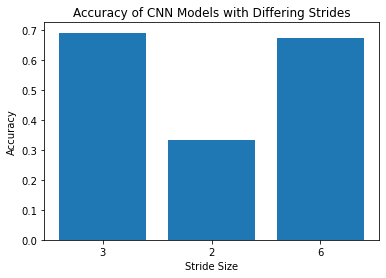

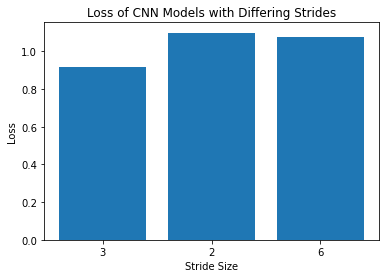

In [218]:
s3_metrics = cnn2_s3.evaluate(test_imgs, test_labels)
s2_metrics = cnn2_s2.evaluate(test_imgs, test_labels)
s6_metrics = cnn2_s6.evaluate(test_imgs, test_labels)

cnn_columns = ['3','2','6']
cnn_metrics = np.vstack((s3_metrics,s2_metrics,s6_metrics))

plt.bar(cnn_columns, cnn_metrics[:,1])
plt.title('Accuracy of CNN Models with Differing Strides')
plt.xlabel('Stride Size')
plt.ylabel('Accuracy')
plt.show()

plt.bar(cnn_columns, cnn_metrics[:,0])
plt.title('Loss of CNN Models with Differing Strides')
plt.xlabel('Stride Size')
plt.ylabel('Loss')
plt.show()

## C. Third CNN

In [194]:
cnn3 = keras.Sequential([
    keras.layers.AveragePooling2D(pool_size=6, strides=3, padding="valid"),
    keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(train_imgs.shape[1],
                                                                           train_imgs.shape[2],
                                                                           train_imgs.shape[3])),
    keras.layers.Conv2D(16, kernel_size=3, activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2),strides=None, padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax'),
])

# Compiling model
cnn3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training model
cnn3.fit(train_imgs, train_labels, epochs=10)

# Model Evaluation
cnn3.evaluate(test_imgs, test_labels)

Epoch 1/10
79/79 [==============================] - 14s 171ms/step - loss: 0.6277 - accuracy: 0.7738
Epoch 2/10
79/79 [==============================] - 14s 174ms/step - loss: 0.1160 - accuracy: 0.9806
Epoch 3/10
79/79 [==============================] - 13s 170ms/step - loss: 0.0354 - accuracy: 0.9929
Epoch 4/10
79/79 [==============================] - 13s 169ms/step - loss: 0.0163 - accuracy: 0.9964
Epoch 5/10
79/79 [==============================] - 14s 174ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 6/10
79/79 [==============================] - 14s 176ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 7/10
79/79 [==============================] - 14s 178ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 8/10
79/79 [==============================] - 14s 177ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 9/10
79/79 [==============================] - 14s 177ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 10/10
12/12 [==============================] - 1s 53ms/step - loss: 0.9066 - accuracy

[0.9066367149353027, 0.7096773982048035]

## D. Forth CNN

In [196]:
cnn4 = keras.Sequential([
    keras.layers.AveragePooling2D(pool_size=6, strides=3, padding="valid"),
    keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(train_imgs.shape[1],
                                                                           train_imgs.shape[2],
                                                                           train_imgs.shape[3])),
    keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2),strides=None, padding='valid'),
    tf.keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax'),
])

# Compiling model
cnn4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training model
cnn4.fit(train_imgs, train_labels, epochs=10)

# Model Evaluation
cnn4.evaluate(test_imgs, test_labels)

Epoch 1/10
79/79 [==============================] - 34s 414ms/step - loss: 0.6273 - accuracy: 0.7587
Epoch 2/10
79/79 [==============================] - 32s 404ms/step - loss: 0.0906 - accuracy: 0.9825
Epoch 3/10
79/79 [==============================] - 32s 410ms/step - loss: 0.0219 - accuracy: 0.9960
Epoch 4/10
79/79 [==============================] - 33s 419ms/step - loss: 0.0114 - accuracy: 0.9988
Epoch 5/10
79/79 [==============================] - 33s 414ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 6/10
79/79 [==============================] - 33s 412ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 7/10
79/79 [==============================] - 33s 415ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 8/10
79/79 [==============================] - 33s 417ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 9/10
79/79 [==============================] - 33s 418ms/step - loss: 8.9474e-04 - accuracy: 1.0000
Epoch 10/10
12/12 [==============================] - 1s 81ms/step - loss: 1.0386 - accu

[1.0385990142822266, 0.6962365508079529]

12/12 [==============================] - 1s 93ms/step - loss: 1.0386 - accuracy: 0.6962


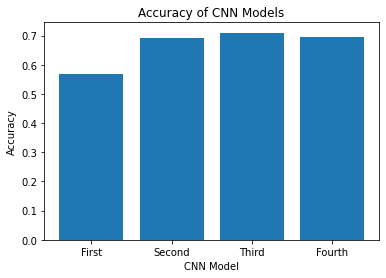

In [216]:
cnn1_metrics = cnn1_1.evaluate(test_imgs, test_labels)
cnn2_metrics = cnn2_s3.evaluate(test_imgs, test_labels)
cnn3_metrics = cnn3.evaluate(test_imgs, test_labels)
cnn4_metrics = cnn4.evaluate(test_imgs, test_labels)

cnn_columns = ['First','Second','Third','Fourth']
cnn_metrics = np.vstack((cnn1_metrics,cnn2_metrics,cnn3_metrics,cnn4_metrics))

plt.bar(cnn_columns, cnn_metrics[:,1])
plt.title('Accuracy of CNN Models')
plt.xlabel('CNN Model')
plt.ylabel('Accuracy')
plt.show()